In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Solardatanew.csv")
data.head(5)

,Timestamp,Air_Temp,Relative_Humidity,Solar_Radiation,RTD,Array_Voltage,Array_Current,Power_Generated
0,00:00.0,16.335964,92.397792,0.224350,25.034259,2.640770,5.399288,14.258278
1,05:00.0,16.289640,92.693440,0.327011,24.965698,2.645897,5.399017,14.285242
2,10:00.0,16.285664,93.123816,0.277451,24.944859,2.660332,5.398926,14.362932
3,15:00.0,16.281720,93.119280,0.376572,25.003318,2.148491,5.399197,11.600126
4,20:00.0,16.244652,93.557512,0.479233,24.979319,2.066124,5.399017,11.155038


In [3]:
waste_1 = data.pop('Timestamp')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561 entries, 0 to 1560
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Air_Temp           1561 non-null   float64
 1   Relative_Humidity  1561 non-null   float64
 2   Solar_Radiation    1561 non-null   float64
 3   RTD                1561 non-null   float64
 4   Array_Voltage      1561 non-null   float64
 5   Array_Current      1561 non-null   float64
 6   Power_Generated    1561 non-null   float64
dtypes: float64(7)
memory usage: 85.5 KB


In [5]:
min_d = data['Power_Generated'].min()

In [6]:
max_d=data['Power_Generated'].max()

In [7]:
data["Power_Generated"].describe()

count    1561.000000
mean      190.154251
std       166.319933
min         8.016555
25%        11.829454
50%       278.411800
75%       302.613840
max       482.491720
Name: Power_Generated, dtype: float64

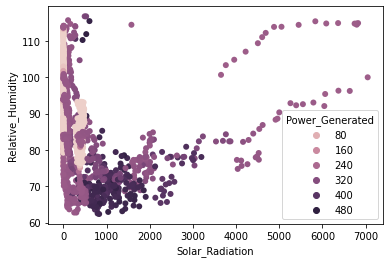

In [8]:
sns.scatterplot(x="Solar_Radiation", y="Relative_Humidity",
                 hue="Power_Generated",
                 sizes=(3, 15), linewidth=0,
                 data=data)

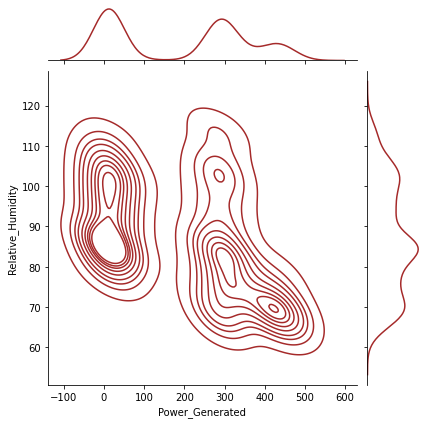

In [9]:
sns.jointplot(x='Power_Generated',y='Relative_Humidity',data = data, kind = 'kde' ,color = 'brown')

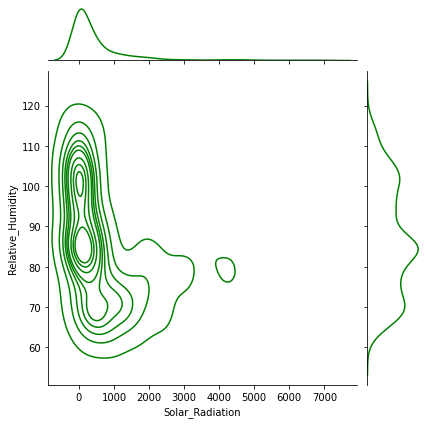

In [10]:
sns.jointplot(x='Solar_Radiation',y='Relative_Humidity',data = data, kind = 'kde' ,color = 'green')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561 entries, 0 to 1560
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Air_Temp           1561 non-null   float64
 1   Relative_Humidity  1561 non-null   float64
 2   Solar_Radiation    1561 non-null   float64
 3   RTD                1561 non-null   float64
 4   Array_Voltage      1561 non-null   float64
 5   Array_Current      1561 non-null   float64
 6   Power_Generated    1561 non-null   float64
dtypes: float64(7)
memory usage: 85.5 KB


In [12]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

names = ["Air_Temp","Relative_Humidity","Solar_Radiation","RTD","Array_Voltage","Array_Current","Power_Generated"] 
data[names] = scaler.fit_transform(data[names])

In [13]:
X = data 
Y = data.pop("Power_Generated")

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [15]:
X.head(10)

,Air_Temp,Relative_Humidity,Solar_Radiation,RTD,Array_Voltage,Array_Current
0,0.123692,0.551456,0.000032,0.045133,0.013128,0.842876
1,0.122157,0.556891,0.000046,0.044163,0.013186,0.835318
2,0.122026,0.564804,0.000039,0.043868,0.013350,0.832780
3,0.121895,0.564720,0.000053,0.044695,0.007541,0.840338
4,0.120667,0.572777,0.000068,0.044356,0.006606,0.835318
5,0.119219,0.581021,0.000068,0.043072,0.006618,0.837772
6,0.117025,0.586509,0.000089,0.042675,0.006665,0.832780
7,0.117025,0.586480,0.000103,0.042546,0.006922,0.827732
8,0.116148,0.591880,0.000103,0.044017,0.007390,0.822712
9,0.116541,0.591851,0.000103,0.045287,0.008044,0.827732


In [16]:
Y.head()

0    0.013155
1    0.013212
2    0.013376
3    0.007553
4    0.006615
Name: Power_Generated, dtype: float64

In [17]:
X.shape

(1561, 6)

In [18]:
%%time
import tensorflow as tf
import random

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.LSTM(300,activation='relu',return_sequences=True,input_shape=(6,1)),
                               tf.keras.layers.Dropout(0.2,seed=42),
                               tf.keras.layers.LSTM(200,activation='relu'),
                               tf.keras.layers.Dropout(0.2,seed=42),
                               tf.keras.layers.Dense(1)])

model_2.compile(loss='mae',
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.005),
                metrics = ['mae'])

history_2 = model_2.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs=15)

Epoch 1/15
39/39 [==============================] - 7s 81ms/step - loss: 0.2241 - mae: 0.2241
Epoch 2/15
39/39 [==============================] - 3s 80ms/step - loss: 0.1017 - mae: 0.1017
Epoch 3/15
39/39 [==============================] - 3s 79ms/step - loss: 0.0698 - mae: 0.0698
Epoch 4/15
39/39 [==============================] - 3s 73ms/step - loss: 0.0577 - mae: 0.0577
Epoch 5/15
39/39 [==============================] - 3s 72ms/step - loss: 0.0449 - mae: 0.0449
Epoch 6/15
39/39 [==============================] - 3s 84ms/step - loss: 0.0372 - mae: 0.0372
Epoch 7/15
39/39 [==============================] - 3s 72ms/step - loss: 0.0345 - mae: 0.0345
Epoch 8/15
39/39 [==============================] - 2s 45ms/step - loss: 0.0366 - mae: 0.0366
Epoch 9/15
39/39 [==============================] - 2s 44ms/step - loss: 0.0357 - mae: 0.0357
Epoch 10/15
39/39 [==============================] - 2s 45ms/step - loss: 0.0346 - mae: 0.0346
Epoch 11/15
39/39 [==============================] - 2s 45m

In [19]:
model_2.evaluate(X_test,Y_test)

10/10 [==============================] - 1s 16ms/step - loss: 0.0226 - mae: 0.0226


[0.02255423367023468, 0.02255423367023468]

Text(0, 0.5, 'Mean Absoulte Error')

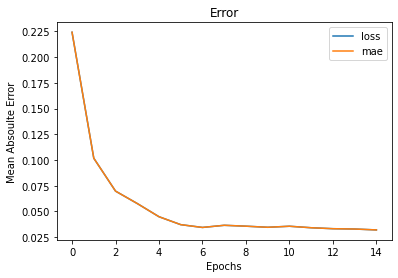

In [20]:
pd.DataFrame(history_2.history).plot()
plt.title("Error")
plt.xlabel("Epochs")
plt.ylabel("Mean Absoulte Error")

In [21]:
pred_2 = model_2.predict(Y_test)

In [22]:
pred_2.shape

(313, 1)

In [23]:
pred_2

array([[0.12001296],
       [0.14859198],
       [0.00774656],
       [0.11703289],
       [0.00968774],
       [0.02653501],
       [0.0078247 ],
       [0.21872751],
       [0.11670761],
       [0.20309111],
       [0.00778265],
       [0.00784765],
       [0.11946099],
       [0.18536733],
       [0.11090162],
       [0.20784698],
       [0.11975782],
       [0.11676727],
       [0.00802229],
       [0.00778253],
       [0.20512569],
       [0.06519293],
       [0.00774241],
       [0.17979479],
       [0.21396188],
       [0.00768407],
       [0.1933854 ],
       [0.00809522],
       [0.00769882],
       [0.19489133],
       [0.11551969],
       [0.12299155],
       [0.0076891 ],
       [0.19635153],
       [0.00775256],
       [0.00780411],
       [0.00765694],
       [0.21997787],
       [0.12276525],
       [0.11733498],
       [0.10552524],
       [0.11390997],
       [0.2002267 ],
       [0.00766725],
       [0.21385682],
       [0.13419804],
       [0.10876917],
       [0.007

In [24]:
#normalized_d = pred_2
#final = normalized_d * (max_d - min_d) + min_d
#final

In [25]:
final_power = pred_2 * (max_d - min_d)+ min_d
final_power

array([[ 64.959724 ],
       [ 78.51976  ],
       [ 11.692104 ],
       [ 63.545757 ],
       [ 12.613146 ],
       [ 20.606758 ],
       [ 11.729179 ],
       [111.797325 ],
       [ 63.39142  ],
       [104.37824  ],
       [ 11.7092285],
       [ 11.740071 ],
       [ 64.69782  ],
       [ 95.96875  ],
       [ 60.63662  ],
       [106.63479  ],
       [ 64.83866  ],
       [ 63.419727 ],
       [ 11.822931 ],
       [ 11.709172 ],
       [105.3436   ],
       [ 38.948982 ],
       [ 11.690138 ],
       [ 93.324715 ],
       [109.536156 ],
       [ 11.662455 ],
       [ 99.773125 ],
       [ 11.857533 ],
       [ 11.669453 ],
       [100.487656 ],
       [ 62.827778 ],
       [ 66.372986 ],
       [ 11.664843 ],
       [101.18048  ],
       [ 11.694953 ],
       [ 11.719409 ],
       [ 11.64958  ],
       [112.390594 ],
       [ 66.26562  ],
       [ 63.689087 ],
       [ 58.08566  ],
       [ 62.06401  ],
       [103.01915  ],
       [ 11.654475 ],
       [109.486305 ],
       [ 7

In [26]:
final_power.shape

(313, 1)